In [1]:
import pandas as pd


In [2]:
guys_df = pd.read_csv('../data_prep/payroll_prepped.csv')
bpd_df = pd.read_csv('../input/bpd.csv')

In [3]:
guys_df.head()

,name,department_name,title,regular,retro,other,overtime,injured,detail,quinn,total_earnings,zip,year
0,abascianojoseph,Boston Police Department,Police Officer,$68181.24,$0.00,$3763.50,$14177.65,$0.00,$4867.00,$0.00,90989.39,02132-3802,2011
1,abdul-azizramadani,Boston Police Department,Police Officer,$73935.02,$0.00,$800.00,$5573.40,$0.00,$44865.00,$0.00,125173.42,02119-1618,2011
2,abreucesar,Boston Police Department,Police Officer,$69701.19,$0.00,$800.00,$37800.40,$0.00,$29826.00,$0.00,138127.59,02136-1540,2011
3,acerichardk,Boston Police Department,Police Officer,$68181.24,$0.00,$800.00,$11180.66,$0.00,$20695.00,$7644.20,108501.10,02136-4045,2011
4,acevedorafaelw,Boston Police Department,Police Officer,$69070.41,$0.00,$800.00,$14745.51,$0.00,$21997.00,$0.00,106612.92,02125-2618,2011


In [4]:
bpd_df.head()

,ia_number,incident_type,received_date,year,title_rank,first_name,last_name,keyname,race,gender,name_known,badge_number,allegation,finding,outcome
0,I2010-001,II,1/5/10,2010.0,Police Officer,Carlos A,Martinez,MartinezCarlosA,H,M,y,2244,Reporting for Duty,Sustained,Oral Reprimand
1,I2010-003,II,1/5/10,2010.0,Detective,Molwyn A,Shaw,ShawMolwynA,B,M,y,983,Reporting for Duty,Sustained,Oral Reprimand
2,E2010-002,CC,1/6/10,2010.0,Sergeant Detective,John J,Fitzgerald,FitzgeraldJohnJ,W,M,y,115,Neg.Duty/Unreasonable Judge,Exonerated,NaN
3,E2010-002,CC,1/6/10,2010.0,Sergeant,Edwin,Guzman,GuzmanEdwin,H,M,y,6595,Neg.Duty/Unreasonable Judge,Exonerated,NaN
4,E2010-002,CC,1/6/10,2010.0,Police Officer,Lynwood,Jenkins,JenkinsLynwood,B,M,y,1218,Neg.Duty/Unreasonable Judge,Exonerated,NaN


In [5]:
bpd_df.keyname = bpd_df.keyname.str.lower()
bpd_df[bpd_df.keyname == 'butlermichaelv']

,ia_number,incident_type,received_date,year,title_rank,first_name,last_name,keyname,race,gender,name_known,badge_number,allegation,finding,outcome
7507,NaN,NaN,NaN,NaN,Police Officer,Michael V,Butler,butlermichaelv,W,M,y,NaN,NaN,NaN,NaN


In [6]:
import numpy as np
altered = []

for name in guys_df.name.unique():
    years = guys_df.year.unique()
    allegations = [0]*len(years)
    sustained = [0]*len(years)
    promotion = [0]*len(years)
    count = 0

    temp_payroll = guys_df[guys_df.name == name].drop_duplicates()
    if len(temp_payroll.year) <= len(years):
    
        if name in bpd_df.keyname.unique():
            temp_bpd = bpd_df[bpd_df.keyname == name]
            temp_payroll = guys_df[guys_df.name == name].drop_duplicates()

            ranks = temp_payroll.title.values
            past_ranks = [ranks[0]]
            for i in range(0,len(ranks)-1):
                if past_ranks.count(ranks[i]) == 0:
                    promotion[i] = 1
                    past_ranks.append(ranks[i])
        
            for year in years:
                if year in temp_bpd.year.values:
                    allegations[count] = temp_bpd[temp_bpd.year == year].allegation.count()
                    sustained[count] = temp_bpd[(temp_bpd.year == year) & (temp_bpd.finding == 'Sustained')].finding.count()
                count += 1
        else:
            temp_payroll = guys_df[guys_df.name == name].drop_duplicates()
        # set new columns to be empty
            ranks = temp_payroll.title.values
            past_ranks = [ranks[0]]
            for i in range(0,len(ranks)-1):
                if past_ranks.count(ranks[i]) == 0:
                    promotion[i] = 1
                    past_ranks.append(ranks[i])
        new_stuff = pd.DataFrame({'year': years, 'allegations': allegations, 'sustained': sustained, 'promotion': promotion})
        temp_prepped = temp_payroll.merge(new_stuff, on='year', how='left')
        altered.append(temp_prepped)

len(altered)

3279

In [7]:
altered[14]

,name,department_name,title,regular,retro,other,overtime,injured,detail,quinn,total_earnings,zip,year,allegations,sustained,promotion
0,ajemiangeraldf,Boston Police Department,Police Offc Hackney Invest 3$8,$68650.92,$0.00,$7634.03,$8355.85,$0.00,$21123.00,$7696.89,113460.69,02081-1521,2011,0,0,0
1,ajemiangeraldf,Boston Police Department,Police Offc Hackney Invest 3$8,$46595.64,$0.00,$7634.03,$5460.17,$22055.28,$11175.00,$6865.30,99785.42,02081-1521,2012,0,0,0
2,ajemiangeraldf,Boston Police Department,Police Officer,$68550.38,$0.00,$7634.03,$22054.16,$0.00,$18834.00,$6895.12,123967.69,02081-1521,2013,0,0,1
3,ajemiangeraldf,Boston Police Department,Police Offc Comm Serv Offc 3$8,$79091.81,$10837.81,$9023.13,$35096.33,$999.10,$16745.00,$10674.00,162467.18,02081,2014,0,0,1
4,ajemiangeraldf,Boston Police Department,Police Offc Comm Serv Offc 3$8,$74389.26,$0.00,$6673.36,$39607.78,$14327.23,$9490.00,$12722.89,157210.52,02081,2015,0,0,0
5,ajemiangeraldf,Boston Police Department,Police Offc Comm Serv Offc 3$8,"$14,677.94",0,"$11,687.48","$6,518.23","$74,437.85","$3,312.00","$13,011.96",123645.46,02081,2016,0,0,0
6,ajemiangeraldf,Boston Police Department,Police Offc Comm Serv Offc 3$8,"$91,648.97","$1,606.38","$10,870.32","$47,880.40",$558.22,"$6,946.00","$14,509.98",174020.27,2081,2017,0,0,0
7,ajemiangeraldf,Boston Police Department,Police Offc Comm Serv Offc 3$8,"94,741.53",0,"7,993.83","44,802.55",0,"12,788.00","17,424.87",177750.78,2081,2018,0,0,0
8,ajemiangeraldf,Boston Police Department,Police Officer,"97,133.75",-,"7,298.85","31,106.43",-,"7,084.00","19,426.74",162049.77,2081,2019,0,0,0
9,ajemiangeraldf,Boston Police Department,Police Officer,"$34,415.16",0,"$11,499.03","$6,859.96","$65,888.12",0,"$20,060.47",138722.74,2081,2020,0,0,0


In [8]:
altered_df = pd.concat(altered)

In [9]:
guilty = altered_df.groupby('name').sustained.sum() > 0
guilty

name
abascianojoseph          False
abdul-azizramadani        True
abrahamsonpatrickolaf    False
abreucesar                True
abreugabriel             False
                         ...  
zinggrobertm              True
zographospetera          False
zouzi                    False
zubrinwilliamw           False
zukowskiiiicharles       False
Name: sustained, Length: 3279, dtype: bool

In [10]:
guilty = guilty[guilty == True]
guilty

name
abdul-azizramadani    True
abreucesar            True
acevedorafaelw        True
acostajosel           True
adamschristopherp     True
                      ... 
wrightlysandere       True
xaviervladimir        True
youngrobertc          True
zarnochkevin          True
zinggrobertm          True
Name: sustained, Length: 548, dtype: bool

In [11]:
guilty_df = altered_df[altered_df.name.isin(guilty.index)]
guilty_df.head()

,name,department_name,title,regular,retro,other,overtime,injured,detail,quinn,total_earnings,zip,year,allegations,sustained,promotion
0,abdul-azizramadani,Boston Police Department,Police Officer,$73935.02,$0.00,$800.00,$5573.40,$0.00,$44865.00,$0.00,125173.42,02119-1618,2011,1,1,0
1,abdul-azizramadani,Boston Police Department,Police Officer,$73935.03,$0.00,$800.00,$3991.31,$0.00,$63479.00,$0.00,142205.34,02119-1618,2012,0,0,0
2,abdul-azizramadani,Boston Police Department,Police Officer,$73105.70,$0.00,$800.00,$9666.15,$0.00,$38188.00,$0.00,121759.85,02119-1618,2013,0,0,0
3,abdul-azizramadani,Boston Police Department,Police Officer,$90317.43,$11196.94,$2749.21,$18239.46,$0.00,$38491.00,$0.00,160994.04,02119,2014,0,0,0
4,abdul-azizramadani,Boston Police Department,Police Officer,$98860.29,$0.00,$2982.89,$24537.03,$0.00,$48426.00,$0.00,174806.21,02119,2015,0,0,0


In [12]:
not_guilty_df = altered_df[~altered_df.name.isin(guilty.index)]
not_guilty_df.head()

,name,department_name,title,regular,retro,other,overtime,injured,detail,quinn,total_earnings,zip,year,allegations,sustained,promotion
0,abascianojoseph,Boston Police Department,Police Officer,$68181.24,$0.00,$3763.50,$14177.65,$0.00,$4867.00,$0.00,90989.39,02132-3802,2011,2,0,0
1,abascianojoseph,Boston Police Department,Police Officer,$69432.97,$0.00,$800.00,$16767.14,$0.00,$1767.00,$0.00,88767.11,02132-3802,2012,0,0,0
2,abascianojoseph,Boston Police Department,Police Officer,$66673.45,$0.00,$800.00,$20318.50,$3163.30,$890.00,$0.00,91845.25,02132-3802,2013,1,0,0
3,abascianojoseph,Boston Police Department,Police Officer,$19469.90,$10200.36,$1491.24,$2565.64,$60753.78,$2553.00,$825.04,97858.96,02132,2014,0,0,0
4,abascianojoseph,Boston Police Department,Police Officer,$-886.20,$0.00,$8088.35,$544.83,$81996.78,$0.00,$20667.80,110411.56,02132,2015,0,0,0


In [13]:
total = guilty_df.year.value_counts().values

In [14]:
prom = guilty_df.groupby('year').promotion.sum().values

In [15]:
guilty_rate = prom/total

In [16]:
years = guilty_df.year.unique()

In [17]:
guilty_graph = pd.DataFrame({'year': years, 'total': total, 'promoted': prom, 'rate': guilty_rate, 'guilty': 1})

guilty_graph.head()

,year,total,promoted,rate,guilty
0,2011,526,0,0.000000,1
1,2012,517,16,0.030948,1
2,2013,515,27,0.052427,1
3,2014,511,22,0.043053,1
4,2015,497,24,0.048290,1


In [18]:
total1 = not_guilty_df.year.value_counts().values
prom1 = not_guilty_df.groupby('year').promotion.sum().values
guilty_rate1 = prom1/total1
years1 = not_guilty_df.year.unique()
not_guilty_graph = pd.DataFrame({'year': years1, 'total': total1, 'promoted': prom1, 'rate': guilty_rate1, 'guilty': 0})

In [19]:
graph = pd.concat([guilty_graph, not_guilty_graph])
graph.head()

,year,total,promoted,rate,guilty
0,2011,526,0,0.000000,1
1,2012,517,16,0.030948,1
2,2013,515,27,0.052427,1
3,2014,511,22,0.043053,1
4,2015,497,24,0.048290,1


In [20]:
%load_ext rpy2.ipython

/Users/jake/.pyenv/versions/3.10.9/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


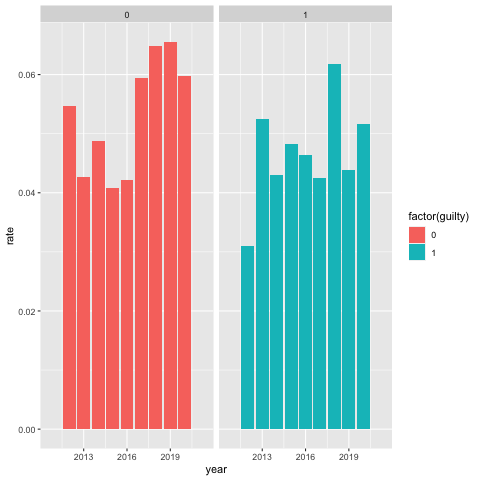

In [21]:
%%R -i graph 

library(ggplot2)

ggplot(graph) +
aes(x=year, y=rate, fill=factor(guilty)) +
facet_wrap(~guilty) +
geom_bar(stat="identity", aplha=0.6, position="dodge")




In [22]:
altered_df.to_csv('../data_prep/bpd_prepped.csv', index=False)